In [187]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Fri Mar  2 03:32:51 2018

@author: ks
"""

# setup the matplotlib graphics library and configure it to show figures inline in the notebook
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# make qutip available in the rest of the notebook
from qutip import *

# Problem parameters
wc = 1.0  * 2 * np.pi  # cavity frequency
wa = 1.0  * 2 * np.pi  # atom frequency
g  = 1.0  * 2 * np.pi # coupling strength
ga = 1.0  * 2 * np.pi

N = 30            # number of cavity fock states
use_rwa = False

# Set up the operators and the Hamiltonian
# operators
a    = tensor(destroy(N), qeye(2))
sm  = tensor(qeye(N), destroy(2))


na  = tensor(qeye(N), sigmaz())        # atom
nc  = tensor(destroy(N).dag() * destroy(N), qeye(2))   # cavity

# decoupled Hamiltonian
H0 = wc * nc + wa * na

# interaction Hamiltonian
if use_rwa:
    H1 = (a.dag() * sm + a * sm.dag())
else:
    H1 = (a.dag() + a) * (sm + sm.dag())
    
H = H0 + g * H1
full_energy, full_eigenstate = H.eigenstates()

# time list
tlist = np.linspace(0, 10, 1001) * 2.0*np.pi

# diagonalized H
diag_H = qdiags(full_energy, 0)

In [188]:
# parity oprtor of pol
# ip_list = []
# in_list = []
positive_list = []
negative_list = []
parity_op = -tensor(((0+np.pi*1j)*destroy(N).dag() * destroy(N)).expm(), sigmaz())
zero = tensor(basis(N, 0) - basis(N, 0), basis(2,0) - basis(2,0))

# parity はんべつ
for i in range(N * 2):
    ei = parity_op * full_eigenstate[i] + full_eigenstate[i]
    if ei == zero:
        positive_list.append(full_energy[i])
        # ip_list.append(i)
    else:
        negative_list.append(full_energy[i])
        # in_list.append(i)
print("p", positive_list)
# print(ip_list)
print("n", negative_list)
# print(in_list)

p [-7.270167698100906, 0.5106319427036148, 8.18723999852775, 10.795982682957911, 18.83473383272245, 26.503920470896844, 29.858931125637383, 38.46732919427945, 44.02266494080723, 49.50568422465545, 57.89589565356999, 61.53064193592355, 69.80063196395031, 75.2704988447493, 81.22015609080812, 89.00798659098132, 93.05927969133256, 101.64986082479858, 106.05907271806942, 114.15975719190935, 120.1895527666097, 129.2050739090541, 135.52063979921004, 147.4370900008718, 156.24359980716147, 165.2661929655574, 178.33953638466292, 192.861626274461, 209.28411982787074, 229.76744466648077]
n [-9.02608090117058, -3.0565028833765195, 5.017730572208334, 13.742541530053328, 18.87293328643596, 24.085489786407983, 32.85153610864412, 36.685230782419005, 43.95203346820111, 51.209137242457395, 55.28794496334597, 64.00521520630771, 68.28511825664172, 75.50205965102006, 82.23442046738452, 87.0380548660897, 95.47045634273937, 99.39321703871389, 107.76726187587624, 112.99693521986505, 121.1909298822668, 127.6576

(<matplotlib.figure.Figure at 0x7fbee0123198>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7fbee019aac8>)

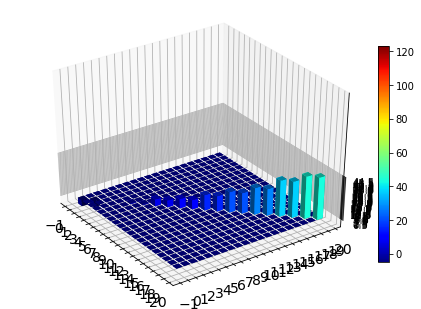

In [60]:
xlabels = []
matrix_histogram(diag_H, xlabels, xlabels, limits=[-5,123])

In [59]:
# ancilla
waa_vec = np.linspace(0, 2.0, 101) * 2 * np.pi # Frequency of ancilla qubit

for waa in waa_vec:
    H_ap = H + waa * nap + ga * (sma + sma.dag()) * (a + a.dag())
    full_energy, full_eigenstate = H.eigenstates()

In [45]:
nap

(Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
 Qobj data =
 [[1. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]],
 Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
 Qobj data =
 [[1. 0.]
  [0. 1.]],
 Quantum object: dims = [[5, 2, 2], [5, 2, 2]], shape = (20, 20), type = oper, isherm = True
 Qobj data =
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 